In [3]:

import numpy as np
import pandas as pd


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mô tả dữ liệu: Mall Customer Segmentation Data
- CustomerID: ID khách hàng
- Gender: Giới tính của khách hàng
- Age: Tuổi khách hàng
- Annual Income (k$): Thu nhập trung bình của khách hàng
- Spending Score (1-100): Điểm tích lũy khi mua sắm của khách hàng

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

D:\Program Files\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Program Files\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Program Files\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

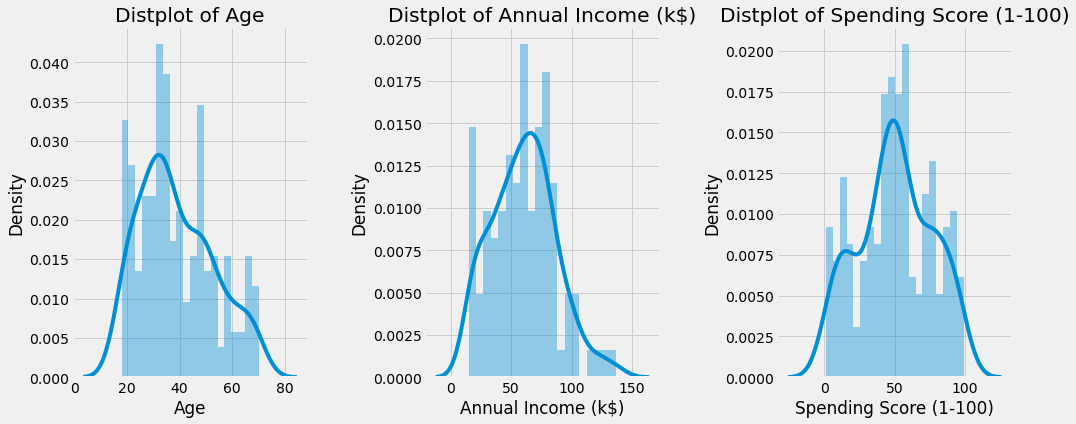

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

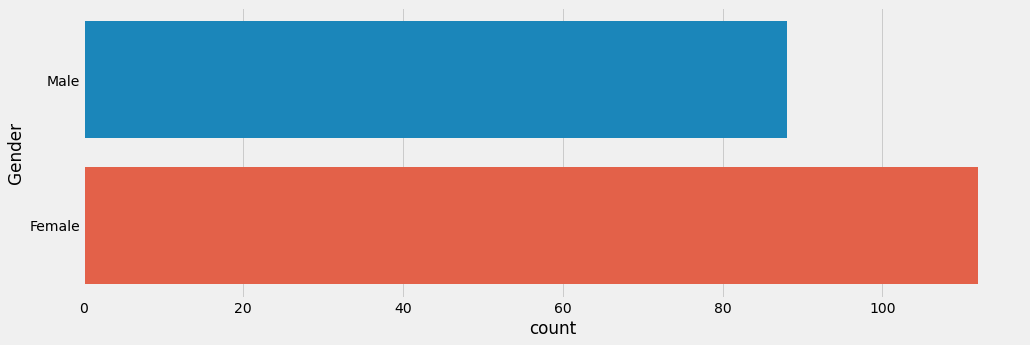

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

## Mối quan hệ giũa Age, Annual Income (k$) và Spending Score (1-100) 

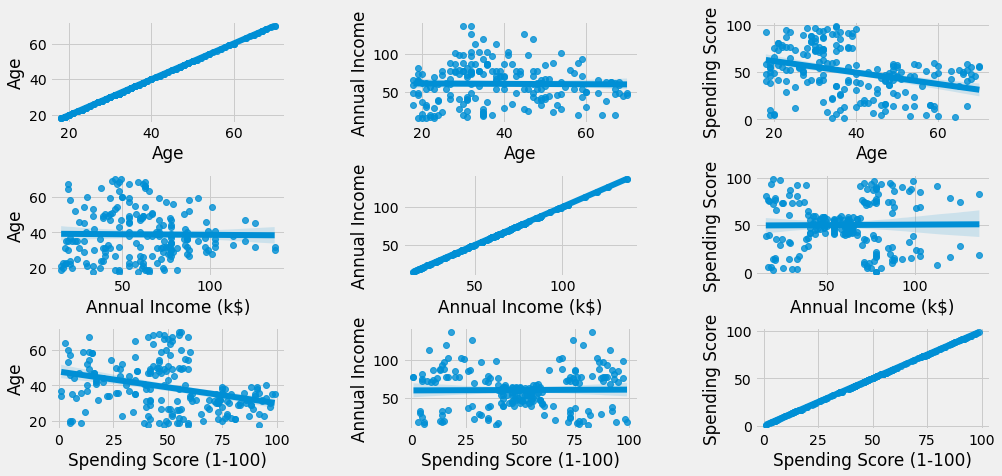

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

## Mối quan hệ Age, Annual Income (k$) và gender

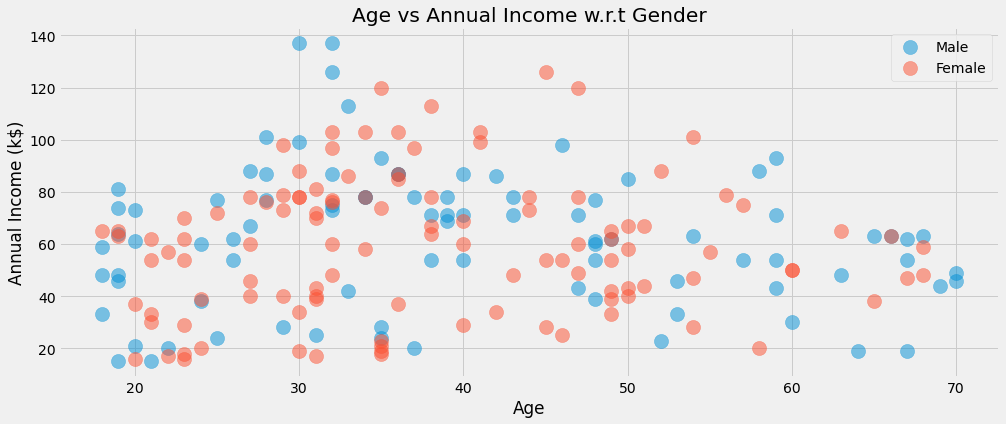

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

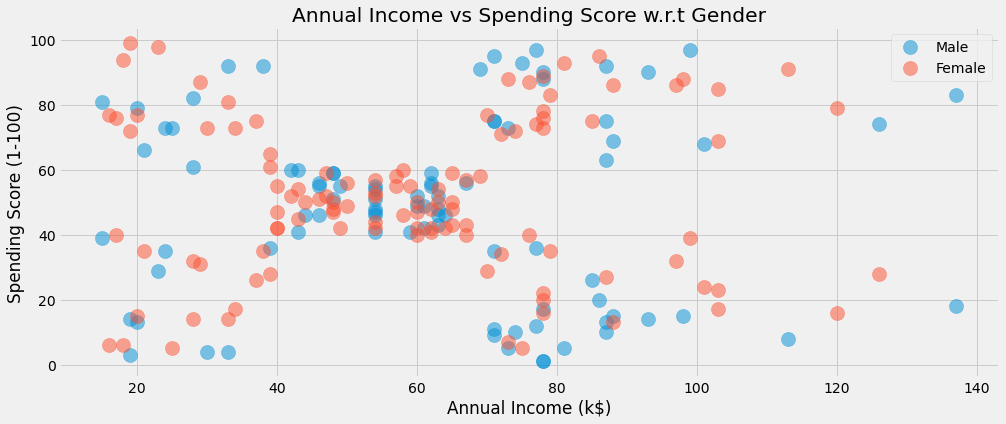

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

# K_Means

In [14]:
from matplotlib.colors import ListedColormap
# Hàm xác định k
def initiate_centroids(k, df):
    centroids = df.sample(k)
    return centroids

In [15]:
# Hàm tính khoảng cách giữa các điểm dữ liệu

def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 


In [16]:
# Hàm gán trọng tâm

def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [17]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

# Age and Spending Score (1-100)

In [18]:
np.random.seed(42)
k1=5
df1 = df[['Age','Spending Score (1-100)']]
centroids = initiate_centroids(k1, df1)
centroids

,Age,Spending Score (1-100)
95,24,52
15,22,79
30,60,4
158,34,1
128,59,11


In [19]:
df1[ 'centroid' ], df1[ 'error' ] = centroid_assignation(df1, centroids)
df1.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\975617123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[ 'centroid' ], df1[ 'error' ] = centroid_assignation(df1, centroids)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13428\975617123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[ 'centroid' ], df1[ 'error' ] = centroid_assignation(df1, centroids)


,Age,Spending Score (1-100),centroid,error
0,19,39,0,37636.0
1,21,81,1,25.0
2,20,6,3,48841.0
3,23,77,1,25.0
4,31,40,0,37249.0


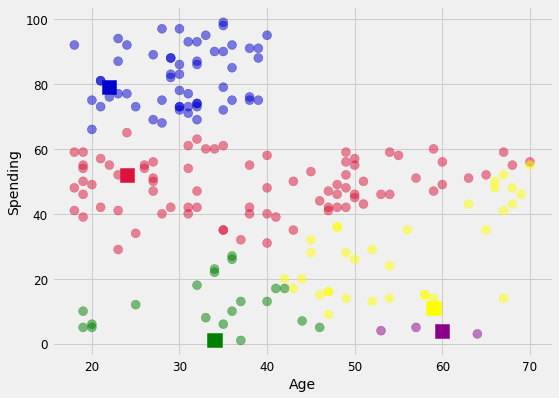

In [22]:
customcmap1 = ListedColormap(["crimson", "mediumblue", "darkmagenta", "green", "yellow"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df1.iloc[:,0], df1.iloc[:,1],  marker = 'o', 
            c=df1['centroid'].astype('category'), 
            cmap = customcmap1, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], 
            marker = 's', s=200, c=[0, 1, 2,3, 4], 
            cmap = customcmap1)
ax.set_xlabel(r'Age', fontsize=14)
ax.set_ylabel(r'Spending', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [20]:
colnames = ['Age', 'Spending Score (1-100)']
centroids = df1.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,Age,Spending Score (1-100)
0,38.650602,48.843373
1,30.000000,82.068966
2,58.500000,4.000000
3,33.333333,12.000000
4,55.529412,28.176471


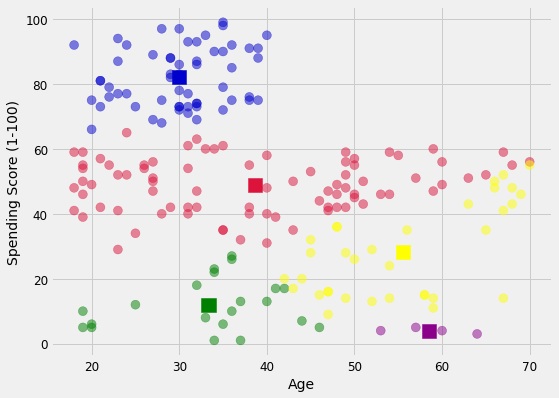

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df1.iloc[:,0], df1.iloc[:,1],  marker = 'o', 
            c=df1['centroid'].astype('category'), 
            cmap = customcmap1, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2, 3, 4], cmap = customcmap1)
ax.set_xlabel(r'Age', fontsize=14)
ax.set_ylabel(r'Spending Score (1-100)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
# Cập nhật lại vị trí trung tâm
np.random.seed(42)
df1['centroid'], df1['error'], centroids =  kmeans(df1[['Age','Spending Score (1-100)']], 5)
df1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Spending Score (1-100),centroid,error
0,19,39,0,35372.792251
1,21,81,1,7398.329516
2,20,6,3,102760.261440
3,23,77,1,6419.023041
4,31,40,0,10544.261635


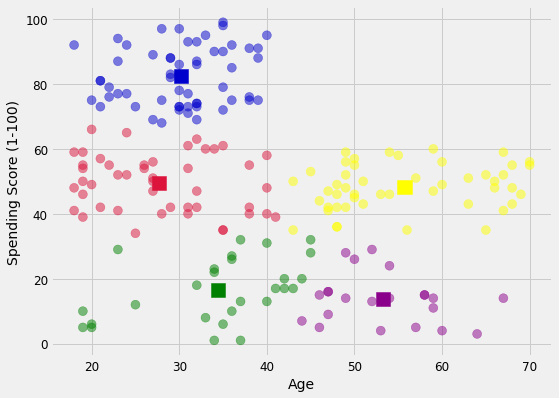

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df1.iloc[:,0], df1.iloc[:,1],  marker = 'o', 
            c=df1['centroid'].astype('category'), 
            cmap = customcmap1, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2, 3, 4], 
            cmap = customcmap1)
ax.set_xlabel(r'Age', fontsize=14)
ax.set_ylabel(r'Spending Score (1-100)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

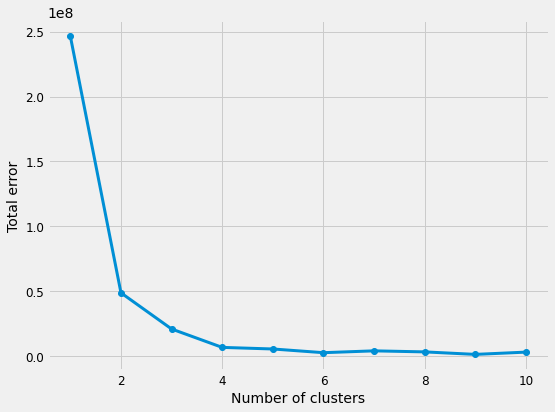

In [24]:
err_total = []
n = 10

df_elbow = df1[['Age','Spending Score (1-100)']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Age and Annual Income (k$)

In [25]:
np.random.seed(42)
k2=4
df2 = df[['Age','Annual Income (k$)']]
centroids = initiate_centroids(k2, df2)
centroids

,Age,Annual Income (k$)
95,24,60
15,22,20
30,60,30
158,34,78


In [26]:
np.random.seed(42)
df2['centroid'], df2['error'], centroids =  kmeans(df2[['Age','Annual Income (k$)']], 4)
df2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Annual Income (k$),centroid,error
0,19,15,1,96807.181253
1,21,15,1,74720.927841
2,20,16,1,69600.662775
3,23,16,1,46715.861652
4,31,17,1,22971.663112


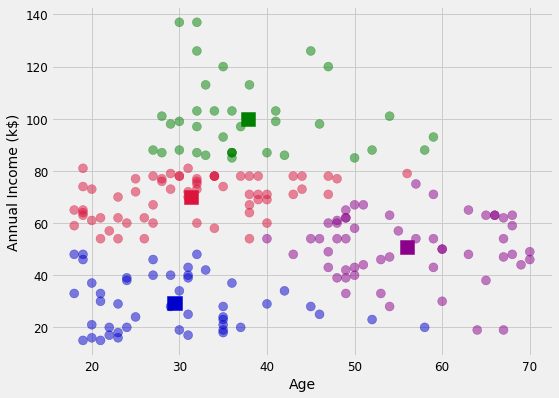

In [27]:
customcmap2 = ListedColormap(["crimson", "mediumblue", "darkmagenta", "green"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df2.iloc[:,0], df2.iloc[:,1],  marker = 'o', 
            c=df2['centroid'].astype('category'), 
            cmap = customcmap2, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2, 3], 
            cmap = customcmap2)
ax.set_xlabel(r'Age', fontsize=14)
ax.set_ylabel(r'Annual Income (k$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

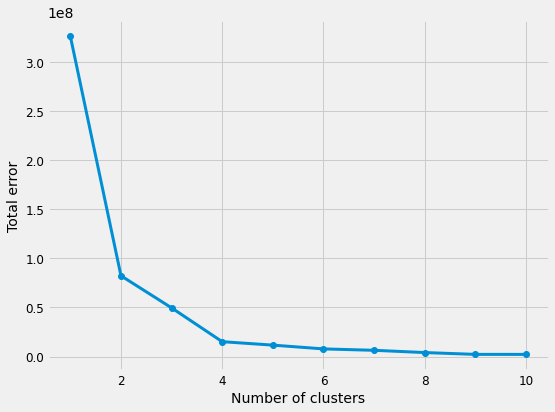

In [28]:
err_total = []
n = 10

df_elbow = df2[['Age','Annual Income (k$)']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Spending Score (1-100) and Annual Income (k$)

In [29]:
np.random.seed(42)
k3 = 5
df3 = df[['Spending Score (1-100)','Annual Income (k$)']]
centroids = initiate_centroids(k3, df3)
centroids

,Spending Score (1-100),Annual Income (k$)
95,52,60
15,79,20
30,4,30
158,1,78
128,11,71


In [30]:
np.random.seed(42)
df3['centroid'], df3['error'], centroids =  kmeans(df3[['Spending Score (1-100)','Annual Income (k$)']], 5)
df3.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Spending Score (1-100),Annual Income (k$),centroid,error
0,39,15,2,206957.916588
1,81,15,1,13865.549075
2,6,16,2,107963.797742
3,77,16,1,10041.365002
4,40,17,2,203295.297290


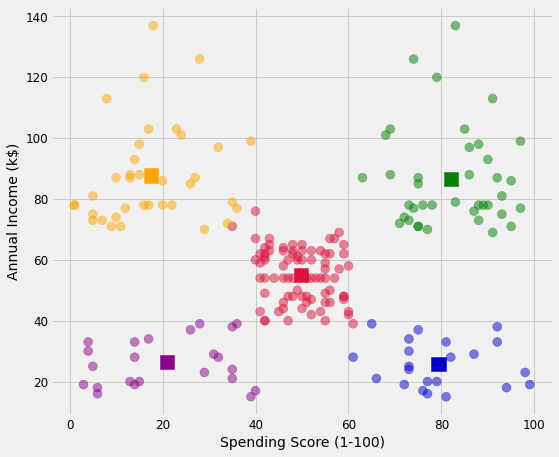

In [31]:
customcmap3 = ListedColormap(["crimson", "mediumblue", "darkmagenta", "green", "orange"])
fig, ax = plt.subplots(figsize=(8, 7))
plt.scatter(df3.iloc[:,0], df3.iloc[:,1],  marker = 'o', 
            c=df3['centroid'].astype('category'), 
            cmap = customcmap3, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2, 3, 4], 
            cmap = customcmap3)
ax.set_xlabel(r'Spending Score (1-100)', fontsize=14)
ax.set_ylabel(r'Annual Income (k$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

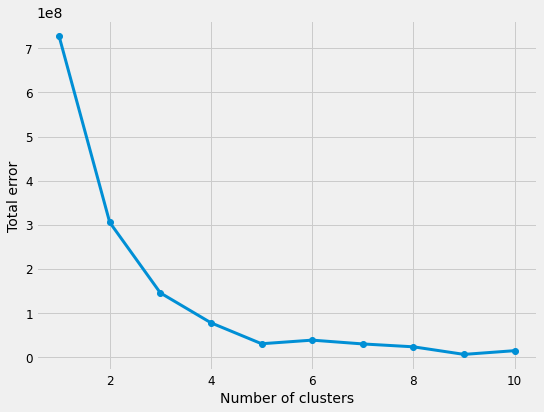

In [32]:
err_total = []
n = 10

df_elbow = df3[['Spending Score (1-100)','Annual Income (k$)']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# K_means with lib

## Age and Spending Score (1-100)

In [32]:
from sklearn.cluster import KMeans

X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

D:\Program Files\ana\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
D:\Program Files\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


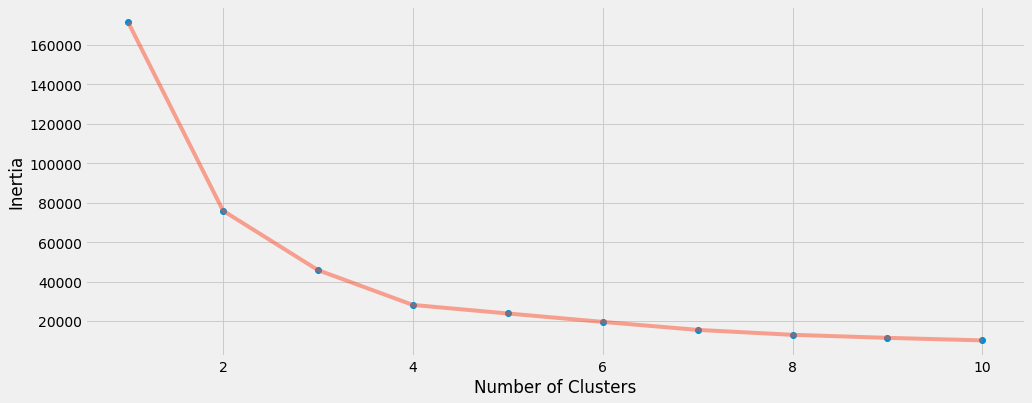

In [34]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [39]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [40]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

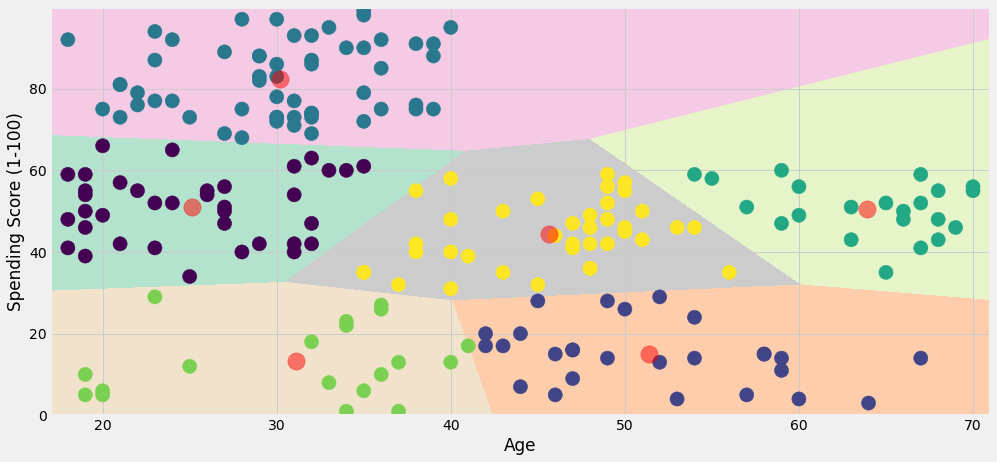

In [41]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [60]:
pred= algorithm.predict([[19,17],[20,55],[60,43],[45,50]])

In [61]:
pred

array([4, 0, 3, 5])

## Annual Income (k$) and Spending Score (1 - 100)

In [38]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


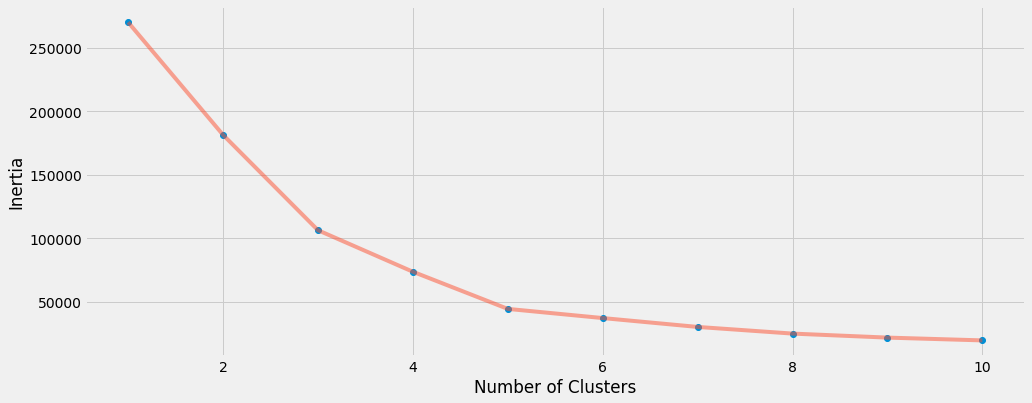

In [39]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [40]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [41]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

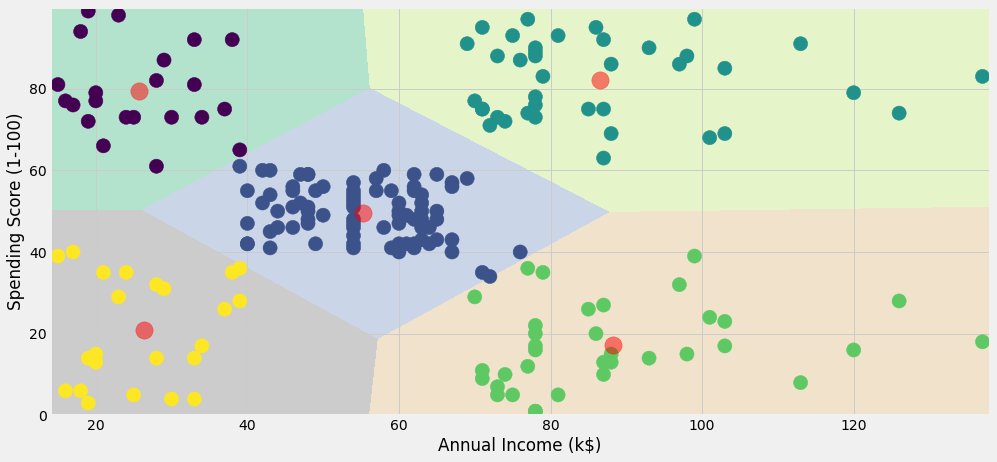

In [42]:
plt.figure(1 , figsize = (15 , 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()